# Univariate summary

Alex Koiter

## Load libraries

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

terra 1.7.78

Attaching package: 'terra'

The following object is masked from 'package:tidyr':

    extract

# load in data

In [ ]:
data <- read_csv(here::here("./notebooks/soil_data.csv"))

Rows: 6078 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): site, element, group
dbl (2): sample_number, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Summarize

In [ ]:
data_summary <- data %>%
  group_by(element) %>%
  group_by(element, site, group) %>%
  summarise(mean = mean(value, na.rm = T),
            sd = sd(value, na.rm = T),
            max = max(value, na.rm = T),
            min = min(value, na.rm = T),
            se = sd(value)/ sqrt(length(value)),
            skewness = moments::skewness(value),
            cv = sd(value, na.rm = TRUE) / mean(value, na.rm = TRUE) * 100, .groups = "drop") 

### Max-min scaling

In [ ]:
data2 <- data %>%
  group_by(element) %>%
  mutate(value2 = (value - min(value, na.rm = T)) / (max(value, na.rm = T) - min(value, na.rm = T))) %>%
  group_by(element, site, group) %>%
  summarise(mean = mean(value2, na.rm = T),
            sd = sd(value2, na.rm = T),
            max = max(value2, na.rm = T),
            min = min(value2, na.rm = T),
            se = sd(value2)/ sqrt(length(value2)),
            skewness = moments::skewness(value2),
            cv = sd(value, na.rm = TRUE) / mean(value, na.rm = TRUE) * 100, .groups = "drop") %>%
  mutate(spacer = case_when(site == "Forest" ~ 1.1,
                            site == "Agriculture"~ 1.2))

## Geochemistry

### plot prep

In [ ]:
geo <- data2 %>%
  filter(group == "geochem") %>%
  mutate(facet = case_when(element %in% c("Ag", "Al", "As","B","Ba","Be","Bi","Ca","Cd","Ce","Co", "Cr", "Cs", "Cu", "Fe", "Ga", "Hf", "Hg", "In", "K", "La", "Li") ~ "Geomchemistry A-L",
                          element %in% c("Mg", "Mn", "Mo", "Nb", "Ni", "P", "Pb", "Rb", "S", "Sb", "Sc", "Se", "Sn", "Sr", "Te", "Th", "Tl", "U", "V", "Y", "Zn", "Zr") ~ "Geomchemistry M-Z",
                          TRUE~ NA)) %>%
  mutate(bar = rep(c(rep(Inf, 2), rep(0, 2)), n()/4)) %>%
  pivot_longer(cols = c(mean, max, min), names_to = "variable") 

geo2 <- data2 %>%
  filter(group == "geochem") %>%
    mutate(facet = case_when(element %in% c("Ag", "Al", "As","B","Ba","Be","Bi","Ca","Cd","Ce","Co", "Cr", "Cs", "Cu", "Fe", "Ga", "Hf", "Hg", "In", "K", "La", "Li") ~ "Geomchemistry A-L",
                          element %in% c("Mg", "Mn", "Mo", "Nb", "Ni", "P", "Pb", "Rb", "S", "Sb", "Sc", "Se", "Sn", "Sr", "Te", "Th", "Tl", "U", "V", "Y", "Zn", "Zr") ~ "Geomchemistry M-Z",
                          TRUE~ NA)) %>%
  mutate(bar = rep(c(rep(Inf, 2), rep(0, 2)), n()/4))

geo3 <- data2 %>%
  filter(group == "geochem") %>%
    mutate(facet = case_when(element %in% c("Ag", "Al", "As","B","Ba","Be","Bi","Ca","Cd","Ce","Co", "Cr", "Cs", "Cu", "Fe", "Ga", "Hf", "Hg", "In", "K", "La", "Li") ~ "Geomchemistry A-L",
                          element %in% c("Mg", "Mn", "Mo", "Nb", "Ni", "P", "Pb", "Rb", "S", "Sb", "Sc", "Se", "Sn", "Sr", "Te", "Th", "Tl", "U", "V", "Y", "Zn", "Zr") ~ "Geomchemistry M-Z",
                          TRUE~ NA)) %>%
  mutate(bar = rep(c(rep(-Inf, 2), rep(0, 2)), n()/4))

### plot

In [ ]:
#| label: suppfig-geo_summary
#| fig-cap: Summary statistics of all measured geochemical soil properties at both sites. Error bars represent 1SD and the numeric values inidicate the CV.

p1 <- ggplot() +
  theme_bw(base_size = 12) +
  geom_bar(data = geo2, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = geo3, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_errorbar(data = geo2, aes(x = element, ymin = mean - sd, ymax = mean + sd, colour = site), width = .1, position = position_dodge(width = 0.5)) +
  geom_point(data = filter(geo, variable == "mean"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 1.5) +
  geom_point(data = filter(geo, variable == "max"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 1.5) +
  geom_point(data = filter(geo, variable == "min"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 1.5) +
  geom_text(data = geo3, aes(x = element, y = spacer, colour = site, label = formatC(cv, digits = 1, format = "f")), show.legend = FALSE, size = 3) +
  guides(color=guide_legend(override.aes=list(shape=NA))) +
  scale_shape_manual(values=c(3, 19, 4)) +
  scale_color_viridis_d(begin = 0.2, end = 0.7) +
  scale_y_continuous(breaks = seq(0, 1, 0.2)) +
  theme(legend.position = "bottom",
        legend.title = element_blank()) +
  labs(y = "Scaled Concentration", x = "Element") +
  facet_wrap(~facet, ncol = 1, scales = "free_x")
p1

## Plot2

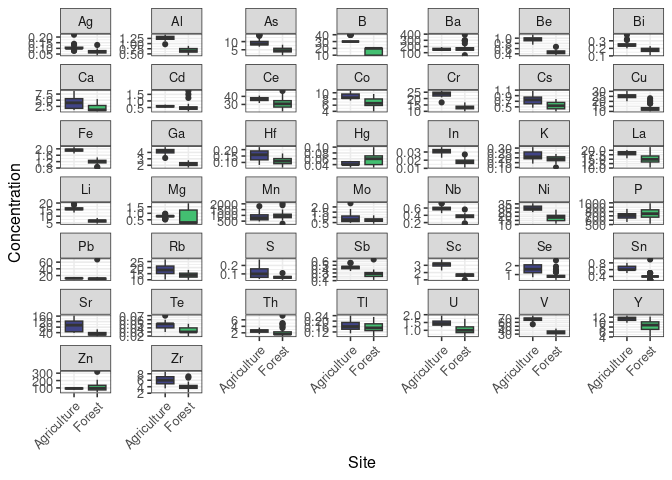

In [ ]:
ggplot(data = filter(data, group == "geochem"), aes(x = site, y = value, fill = site))+
  geom_boxplot() +
  theme_bw(base_size = 12) +
  scale_fill_viridis_d(begin = 0.2, end = 0.7) +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(x = "Site", y = "Concentration") +
  facet_wrap(~element, scales = "free_y")

### Table

In [ ]:
geo_tab <- data_summary %>%
  filter(group == "geochem") %>%
  select(-group) 

knitr::kable(geo_tab, digits = 3)

  ---------------------------------------------------------------------------------------------
  element   site               mean        sd        max       min       se   skewness       cv
  --------- ------------- --------- --------- ---------- --------- -------- ---------- --------
  Ag        Agriculture       0.106     0.021      0.220     0.080    0.003      3.302   19.927

  Ag        Forest            0.072     0.015      0.130     0.040    0.002      1.109   20.428

  Al        Agriculture       1.274     0.090      1.430     0.970    0.013     -0.607    7.099

  Al        Forest            0.668     0.109      0.890     0.440    0.016      0.229   16.391

  As        Agriculture       9.351     2.067     14.200     6.900    0.295      1.008   22.101

  As        Forest            4.845     1.436      8.100     1.700    0.205      0.270   29.640

  B         Agriculture      31.633     3.734     40.000    30.000    0.533      1.822   11.805

  B         Forest           15.918     4.966     20.000    10.000    0.709     -0.374   31.196

  Ba        Agriculture     154.898    19.378    190.000   130.000    2.768      0.328   12.510

  Ba        Forest          173.878    54.575    390.000    60.000    7.796      1.854   31.387

  Be        Agriculture       0.959     0.081      1.130     0.750    0.012      0.009    8.423

  Be        Forest            0.462     0.067      0.670     0.350    0.010      0.451   14.536

  Bi        Agriculture       0.250     0.032      0.380     0.200    0.005      1.764   12.774

  Bi        Forest            0.178     0.031      0.230     0.110    0.004     -0.484   17.444

  Ca        Agriculture       4.001     2.187      8.780     0.950    0.312      0.277   54.664

  Ca        Forest            1.887     1.530      5.460     0.470    0.219      1.067   81.120

  Cd        Agriculture       0.592     0.057      0.720     0.480    0.008     -0.008    9.604

  Cd        Forest            0.518     0.284      1.760     0.210    0.041      2.875   54.782

  Ce        Agriculture      36.800     2.359     41.000    31.800    0.337     -0.244    6.411

  Ce        Forest           31.190     5.532     46.800    21.400    0.790      0.524   17.736

  Co        Agriculture       8.755     0.830     10.600     7.500    0.119      0.521    9.479

  Co        Forest            6.757     1.393      9.600     4.000    0.199      0.030   20.622

  Cr        Agriculture      23.388     1.935     26.000    17.000    0.276     -0.630    8.271

  Cr        Forest           13.408     1.567     17.000    10.000    0.224      0.090   11.686

  Cs        Agriculture       0.745     0.148      1.070     0.470    0.021      0.182   19.926

  Cs        Forest            0.553     0.120      0.780     0.340    0.017      0.249   21.734

  Cu        Agriculture      25.169     2.264     30.400    20.100    0.323      0.104    8.997

  Cu        Forest           13.145     2.816     23.100    10.100    0.402      1.786   21.425

  Fe        Agriculture       1.918     0.090      2.110     1.710    0.013     -0.255    4.702

  Fe        Forest            1.182     0.133      1.460     0.830    0.019     -0.584   11.239

  Ga        Agriculture       4.202     0.341      4.830     3.140    0.049     -0.594    8.120

  Ga        Forest            2.209     0.277      2.770     1.650    0.040      0.097   12.533

  Hf        Agriculture       0.154     0.038      0.220     0.080    0.005     -0.086   24.639

  Hf        Forest            0.116     0.028      0.170     0.060    0.004      0.104   23.798

  Hg        Agriculture       0.043     0.007      0.050     0.030    0.001     -0.459   16.499

  Hg        Forest            0.056     0.018      0.100     0.030    0.003      0.379   32.290

  In        Agriculture       0.031     0.003      0.036     0.023    0.000     -0.351    8.553

  In        Forest            0.018     0.003      0.027     0.011    0.000      0.236   17.736

  K         Agriculture       0.222     0.045      0.310     0.140    0.006      0.436   20.440

  K         Forest            0.187     0.033      0.240     0.100    0.005     -0.294   17.849

  La        Agriculture      18.231     1.223     20.200    15.500    0.175     -0.293    6.708

  La        Forest           15.000     2.596     21.800    10.300    0.371      0.330   17.308

  Li        Agriculture      15.622     1.423     19.800    12.800    0.203      0.618    9.108

  Li        Forest            6.465     0.898      8.600     4.300    0.128     -0.022   13.887

  Mg        Agriculture       0.765     0.097      0.970     0.520    0.014     -0.511   12.617

  Mg        Forest            0.615     0.559      1.770     0.200    0.080      1.023   90.906

  Mn        Agriculture     865.143   318.206   1800.000   468.000   45.458      0.940   36.781

  Mn        Forest          996.367   313.072   2050.000   277.000   44.725      1.014   31.421

  Mo        Agriculture       0.932     0.410      2.350     0.470    0.059      1.182   43.951

  Mo        Forest            0.757     0.193      1.190     0.390    0.028      0.570   25.552

  Nb        Agriculture       0.589     0.057      0.730     0.460    0.008      0.452    9.669

  Nb        Forest            0.372     0.064      0.560     0.170    0.009     -0.677   17.103

  Ni        Agriculture      29.627     2.716     35.700    25.000    0.388      0.356    9.169

  Ni        Forest           18.092     3.898     28.000    11.000    0.557      0.328   21.548

  P         Agriculture     701.429    72.342    860.000   560.000   10.335      0.154   10.313

  P         Forest          749.184   117.948    990.000   520.000   16.850      0.053   15.744

  Pb        Agriculture      11.702     0.798     13.200     9.900    0.114     -0.198    6.815

  Pb        Forest           11.941     8.419     68.000     7.100    1.203      6.192   70.507

  Rb        Agriculture      18.429     4.326     26.700    10.200    0.618      0.244   23.477

  Rb        Forest           13.831     1.853     18.100     9.900    0.265      0.273   13.397

  S         Agriculture       0.120     0.071      0.270     0.040    0.010      0.770   59.479

  S         Forest            0.060     0.019      0.110     0.030    0.003      0.506   31.894

  Sb        Agriculture       0.446     0.049      0.560     0.350    0.007      0.230   11.078

  Sb        Forest            0.270     0.090      0.650     0.120    0.013      1.301   33.332

  Sc        Agriculture       3.149     0.338      3.800     2.300    0.048     -0.256   10.732

  Sc        Forest            1.624     0.237      2.000     1.000    0.034     -0.572   14.574

  Se        Agriculture       1.616     0.535      2.700     0.700    0.076      0.182   33.085

  Se        Forest            0.896     0.371      2.600     0.400    0.053      2.522   41.386

  Sn        Agriculture       0.647     0.058      0.800     0.500    0.008      0.120    8.981

  Sn        Forest            0.398     0.090      0.900     0.300    0.013      3.492   22.644

  Sr        Agriculture      91.314    38.981    163.500    38.600    5.569      0.093   42.689

  Sr        Forest           32.427    12.605     64.200    15.300    1.801      0.983   38.872

  Te        Agriculture       0.046     0.008      0.070     0.030    0.001      0.402   17.736

  Te        Forest            0.034     0.007      0.050     0.020    0.001     -0.022   21.598

  Th        Agriculture       2.565     0.504      3.600     1.600    0.072     -0.084   19.629

  Th        Forest            2.173     1.216      7.300     1.000    0.174      2.185   55.932

  Tl        Agriculture       0.169     0.035      0.240     0.110    0.005      0.365   20.763

  Tl        Forest            0.153     0.034      0.230     0.090    0.005      0.325   22.199

  U         Agriculture       1.475     0.186      1.940     1.200    0.027      0.591   12.638

  U         Forest            1.026     0.254      1.740     0.630    0.036      0.359   24.792

  V         Agriculture      67.857     4.198     77.000    55.000    0.600     -0.363    6.187

  V         Forest           34.122     4.910     44.000    25.000    0.701      0.269   14.390

  Y         Agriculture      11.291     0.726     12.600     9.750    0.104     -0.427    6.431

  Y         Forest            8.435     2.005     12.200     4.370    0.286     -0.348   23.766

  Zn        Agriculture      93.796     7.681    106.000    75.000    1.097     -0.222    8.189

  Zn        Forest          109.551    53.267    318.000    42.000    7.610      1.425   48.623

  Zr        Agriculture       6.063     1.321      8.600     3.500    0.189     -0.103   21.781

  Zr        Forest            4.135     0.916      7.200     2.300    0.131      1.123   22.164
  ---------------------------------------------------------------------------------------------


## Colour

### plot prep

In [ ]:
colour <- data2 %>%
  filter(group == "colour") %>%
  mutate(element = str_extract(element, ("[:alpha:](?=_)"))) %>% # remove _col
  mutate(bar = c(rep(c(rep(Inf, 2), rep(0, 2)), 7), Inf, Inf)) %>%
  pivot_longer(cols = c(mean, max, min), names_to = "variable") 

colour2 <- data2 %>%
  filter(group == "colour") %>%
  mutate(element = str_extract(element, ("[:alpha:](?=_)"))) %>% # remove _col
  mutate(bar = c(rep(c(rep(Inf, 2), rep(0, 2)), 7), Inf, Inf))

colour3 <- data2 %>%
  filter(group == "colour") %>%
  mutate(element = str_extract(element, ("[:alpha:](?=_)"))) %>% # remove _col
  mutate(bar = c(rep(c(rep(-Inf, 2), rep(0, 2)), 7), -Inf, -Inf))

### plot

In [ ]:
#| label: suppfig-colour_summary
#| fig-cap: Summary statistics of all measured geochemical soil properties at both sites. Error bars represent 1SD and the numeric values inidicate the CV.

p2 <- ggplot() +
  theme_bw(base_size = 12) +
  geom_bar(data = colour2, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = colour3, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_errorbar(data = colour2, aes(x = element, ymin = mean - sd, ymax = mean + sd, colour = site), width = .1, position = position_dodge(width = 0.5)) +
  geom_point(data = filter(colour, variable == "mean"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_point(data = filter(colour, variable == "max"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_point(data = filter(colour, variable == "min"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_text(data = colour3, aes(x = element, y = spacer, colour = site, label = formatC(cv, digits = 1, format = "f")), show.legend = FALSE, size = 4) +
  guides(color=guide_legend(override.aes=list(shape=NA))) +
  scale_shape_manual(values=c(3, 19, 4)) +
  scale_color_viridis_d(begin = 0.2, end = 0.7) +
  scale_y_continuous(breaks = seq(0, 1, 0.2)) +
  theme(legend.position = "bottom",
        legend.title = element_blank()) +
  labs(y = "Scaled value", x = "Colour coefficient") 
p2

### Plot2

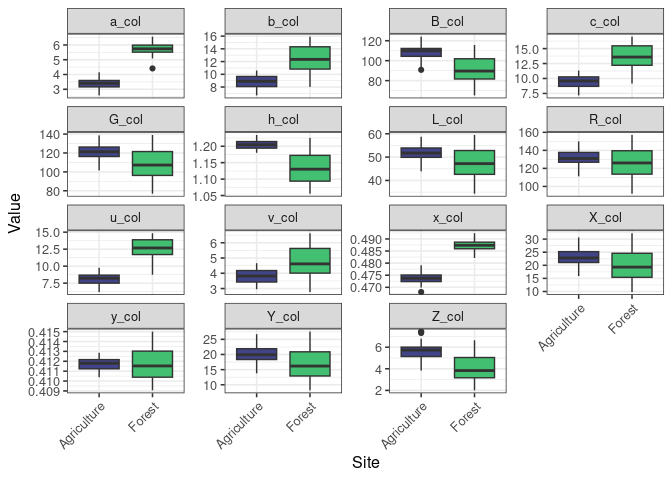

In [ ]:
ggplot(data = filter(data, group == "colour"), aes(x = site, y = value, fill = site))+
  geom_boxplot() +
  theme_bw(base_size = 12) +
  scale_fill_viridis_d(begin = 0.2, end = 0.7) +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(x = "Site", y = "Value") +
  facet_wrap(~element, scales = "free_y")

### Table

In [ ]:
colour_tab <- data_summary %>%
  filter(group == "colour") %>%
  mutate(element = str_extract(element, ("[:alpha:](?=_)"))) %>% # remove _col
  select(-group) 

knitr::kable(colour_tab, digits = 3)

  ------------------------------------------------------------------------------------------
  element   site               mean       sd       max       min      se   skewness       cv
  --------- ------------- --------- -------- --------- --------- ------- ---------- --------
  B         Agriculture     108.713    7.138   124.075    90.820   1.020     -0.068    6.566

  B         Forest           91.596   12.252   115.728    65.214   1.750     -0.026   13.376

  G         Agriculture     121.574    7.814   138.629   101.553   1.116      0.085    6.427

  G         Forest          108.599   15.617   139.062    76.917   2.231      0.043   14.380

  L         Agriculture      51.993    3.097    58.684    43.914   0.442      0.066    5.956

  L         Forest           47.451    6.346    59.480    34.342   0.907     -0.022   13.373

  R         Agriculture     132.290    8.146   149.933   111.218   1.164      0.153    6.158

  R         Forest          125.584   16.808   157.058    91.971   2.401     -0.014   13.384

  X         Agriculture      23.306    3.162    30.618    15.890   0.452      0.357   13.567

  X         Forest           19.909    5.772    32.219     9.801   0.825      0.295   28.993

  Y         Agriculture      20.261    2.772    26.688    13.779   0.396      0.349   13.680

  Y         Forest           16.846    4.963    27.550     8.173   0.709      0.315   29.458

  Z         Agriculture       5.638    0.779     7.438     3.838   0.111      0.234   13.822

  Z         Forest            4.113    1.148     6.640     2.007   0.164      0.284   27.910

  a         Agriculture       3.383    0.322     4.152     2.586   0.046     -0.026    9.531

  a         Forest            5.732    0.407     6.562     4.411   0.058     -0.378    7.095

  b         Agriculture       8.842    0.973    10.587     6.689   0.139     -0.183   11.004

  b         Forest           12.469    2.009    15.909     8.016   0.287      0.221   16.109

  c         Agriculture       9.468    1.017    11.324     7.172   0.145     -0.189   10.741

  c         Forest           13.739    1.943    16.998     9.149   0.278      0.149   14.145

  h         Agriculture       1.205    0.013     1.234     1.180   0.002      0.185    1.116

  h         Forest            1.134    0.047     1.225     1.056   0.007      0.342    4.130

  u         Agriculture       8.075    0.816     9.774     6.202   0.117     -0.137   10.101

  u         Forest           12.749    1.379    14.839     8.750   0.197     -0.298   10.812

  v         Agriculture       3.803    0.438     4.659     2.956   0.063     -0.065   11.529

  v         Forest            4.788    1.041     6.620     2.772   0.149      0.307   21.739

  x         Agriculture       0.474    0.002     0.479     0.468   0.000      0.064    0.462

  x         Forest            0.487    0.002     0.492     0.482   0.000     -0.208    0.466

  y         Agriculture       0.412    0.001     0.413     0.410   0.000     -0.291    0.146

  y         Forest            0.412    0.002     0.415     0.409   0.000      0.416    0.424
  ------------------------------------------------------------------------------------------


## PSA and organic matter

### plot prep

In [ ]:
psa <- data2 %>%
  filter(group %in% c("psa", "organic")) %>%
  mutate(bar = c(rep(c(rep(Inf, 2), rep(0, 2)), 1), Inf, Inf)) %>%
  pivot_longer(cols = c(mean, max, min), names_to = "variable") 

psa2 <- data2 %>%
  filter(group %in% c("psa", "organic")) %>%
  mutate(bar = c(rep(c(rep(Inf, 2), rep(0, 2)), 1), Inf, Inf)) 

psa3 <- data2 %>%
  filter(group %in% c("psa", "organic")) %>%
  mutate(bar = c(rep(c(rep(-Inf, 2), rep(0, 2)), 1), -Inf, -Inf))

### plot

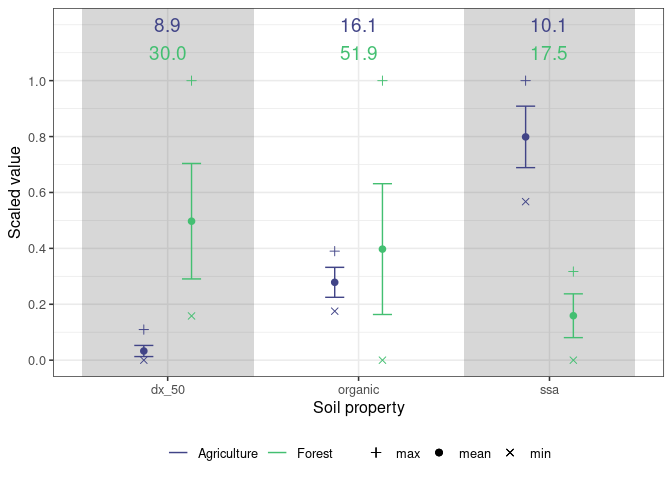

In [ ]:
ggplot() +
  theme_bw(base_size = 12) +
  geom_bar(data = psa2, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = psa3, aes(x=element, y = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_errorbar(data = psa2, aes(x = element, ymin = mean - sd, ymax = mean + sd, colour = site), width = .2, position = position_dodge(width = 0.5)) +
  geom_point(data = filter(psa, variable == "mean"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_point(data = filter(psa, variable == "max"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_point(data = filter(psa, variable == "min"), aes(x = element, y = value, colour = site, shape = variable), position = position_dodge(width = 0.5), show.legend = TRUE, size = 2) +
  geom_text(data = psa3, aes(x = element, y = spacer, colour = site, label = formatC(cv, digits = 1, format = "f")), show.legend = FALSE, size = 5) +
  guides(color=guide_legend(override.aes=list(shape=NA))) +
  scale_shape_manual(values=c(3, 19, 4)) +
  scale_color_viridis_d(begin = 0.2, end = 0.7) +
  scale_y_continuous(breaks = seq(0, 1, 0.2)) +
  theme(legend.position = "bottom",
        legend.title = element_blank()) +
  labs(y = "Scaled value", x = "Soil property") 

## Plot2

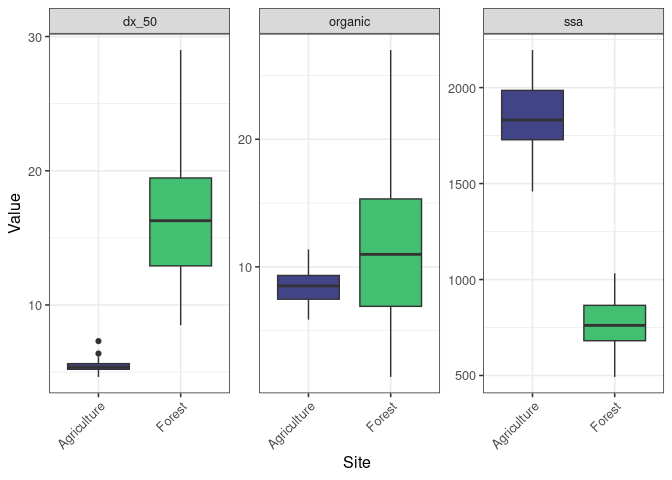

In [ ]:
ggplot(data = filter(data, group %in% c("psa", "organic")), aes(x = site, y = value, fill = site))+
  geom_boxplot() +
  theme_bw(base_size = 12) +
  scale_fill_viridis_d(begin = 0.2, end = 0.7) +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(x = "Site", y = "Value") +
  facet_wrap(~element, scales = "free_y")

### Table

In [ ]:
psa_tab <- data_summary %>%
  filter(group %in% c("psa", "organic")) %>%
  select(-group) 

knitr::kable(psa_tab, digits = 3)

  -----------------------------------------------------------------------------------------------
  element   site                mean        sd        max        min       se   skewness       cv
  --------- ------------- ---------- --------- ---------- ---------- -------- ---------- --------
  dx_50     Agriculture        5.437     0.484      7.305      4.638    0.069      1.177    8.908

  dx_50     Forest            16.747     5.030     28.992      8.492    0.711      0.662   30.034

  organic   Agriculture        8.508     1.373     11.363      5.863    0.196      0.068   16.132

  organic   Forest            11.551     5.993     26.987      1.373    0.856      0.372   51.886

  ssa       Agriculture     1853.021   187.324   2195.720   1458.533   26.761      0.000   10.109

  ssa       Forest           763.475   133.484   1032.611    492.593   18.878     -0.084   17.484
  -----------------------------------------------------------------------------------------------


In [ ]:
summary_tab <- data_summary %>%
  filter(element %in% c("Li", "a_col", "Fe", "Co", "x_col", "Cs", "La", "Ni", "Nb", "h_col", "b_col", "Rb", "Ca", "Sr", "c_col")) %>%
   mutate(element = as.character(fct_recode(element, "a*" = "a_col", "b*" = "b_col", "c*" = "c_col", "h*" = "h_col", "x" = "x_col"))) %>%
  rename("Property" = "element", "Mean" = "mean", "SD" = "sd", "Max" = "max", "Min" = "min", "Skewness" = "skewness", "CV" = "cv") %>%
   mutate(Property = fct_relevel(Property, "Ca", "Co", "Cs", "Fe", "Li", "La", "Nb", "Ni", "Rb", "Sr", "a*", "b*", "c*", "h*", "x")) %>%
  arrange(Property) |>
  mutate(Property = as.character(Property))

In [ ]:
#| label: tbl-univariate-summary
#| tbl-cap: Summary univariate statistics of selected geochemical and colour soil properties for each site (n = 49).

summary_tab |>
  group_by(site) |>
  select(-group, -se) |>
  gt() |>
  #fmt_markdown(columns = Element)|>
  fmt_number(decimals = 2) |>
  #cols_align(align = "left") |>
  tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_options(column_labels.font.weight = "bold") |>
tab_style(
    style = list(cell_text(style = "italic")),
    locations = cells_body(
      columns = Property,
      rows = Property %in% c("a*", "b*", "c*", "h*", "x")))

Property 
 Mean 
 SD 
 Max 
 Min 
 Skewness 
 CV 
 
 
 
 
 Agriculture 
 
 Ca 
 4.00 
 2.19 
 8.78 
 0.95 
 0.28 
 54.66 
 Co 
 8.76 
 0.83 
 10.60 
 7.50 
 0.52 
 9.48 
 Cs 
 0.75 
 0.15 
 1.07 
 0.47 
 0.18 
 19.93 
 Fe 
 1.92 
 0.09 
 2.11 
 1.71 
 −0.25 
 4.70 
 Li 
 15.62 
 1.42 
 19.80 
 12.80 
 0.62 
 9.11 
 La 
 18.23 
 1.22 
 20.20 
 15.50 
 −0.29 
 6.71 
 Nb 
 0.59 
 0.06 
 0.73 
 0.46 
 0.45 
 9.67 
 Ni 
 29.63 
 2.72 
 35.70 
 25.00 
 0.36 
 9.17 
 Rb 
 18.43 
 4.33 
 26.70 
 10.20 
 0.24 
 23.48 
 Sr 
 91.31 
 38.98 
 163.50 
 38.60 
 0.09 
 42.69 
 a* 
 3.38 
 0.32 
 4.15 
 2.59 
 −0.03 
 9.53 
 b* 
 8.84 
 0.97 
 10.59 
 6.69 
 −0.18 
 11.00 
 c* 
 9.47 
 1.02 
 11.32 
 7.17 
 −0.19 
 10.74 
 h* 
 1.20 
 0.01 
 1.23 
 1.18 
 0.19 
 1.12 
 x 
 0.47 
 0.00 
 0.48 
 0.47 
 0.06 
 0.46 
 
 Forest 
 
 Ca 
 1.89 
 1.53 
 5.46 
 0.47 
 1.07 
 81.12 
 Co 
 6.76 
 1.39 
 9.60 
 4.00 
 0.03 
 20.62 
 Cs 
 0.55 
 0.12 
 0.78 
 0.34 
 0.25 
 21.73 
 Fe 
 1.18 
 0.13 
 1.46 
 0.83 
 −0.58 
 11.24 
 Li 
 6.47 
 0.90 
 8.60 
 4.30 
 −0.02 
 13.89 
 La 
 15.00 
 2.60 
 21.80 
 10.30 
 0.33 
 17.31 
 Nb 
 0.37 
 0.06 
 0.56 
 0.17 
 −0.68 
 17.10 
 Ni 
 18.09 
 3.90 
 28.00 
 11.00 
 0.33 
 21.55 
 Rb 
 13.83 
 1.85 
 18.10 
 9.90 
 0.27 
 13.40 
 Sr 
 32.43 
 12.60 
 64.20 
 15.30 
 0.98 
 38.87 
 a* 
 5.73 
 0.41 
 6.56 
 4.41 
 −0.38 
 7.10 
 b* 
 12.47 
 2.01 
 15.91 
 8.02 
 0.22 
 16.11 
 c* 
 13.74 
 1.94 
 17.00 
 9.15 
 0.15 
 14.15 
 h* 
 1.13 
 0.05 
 1.23 
 1.06 
 0.34 
 4.13 
 x 
 0.49 
 0.00 
 0.49 
 0.48 
 −0.21 
 0.47

In [ ]:
forest_data <- read_csv(here::here("./notebooks/forest_terrain_data.csv"), show_col_types = FALSE) %>%
  pivot_longer(cols = li:elevation, names_to = "property", values_to = "value") %>%
  group_by(property) %>%
  summarise(Mean = mean(value, na.rm = T),
            SD = sd(value, na.rm = T),
            Max = max(value, na.rm = T),
            Min = min(value, na.rm = T),
            #Se = sd(value)/ sqrt(length(value)),
            Skewness = moments::skewness(value, na.rm = TRUE),
            CV = sd(value, na.rm = TRUE) / mean(value, na.rm = TRUE) * 100, .groups = "drop") %>%
  mutate(site = "Forest")

ag_data <- read_csv(here::here("./notebooks/ag_terrain_data.csv"), show_col_types = FALSE) %>%
  pivot_longer(cols = li:elevation, names_to = "property", values_to = "value") %>%
  group_by(property) %>%
  summarise(Mean = mean(value, na.rm = T),
            SD = sd(value, na.rm = T),
            Max = max(value, na.rm = T),
            Min = min(value, na.rm = T),
            #Se = sd(value)/ sqrt(length(value)),
            Skewness = moments::skewness(value, na.rm = TRUE),
            CV = sd(value, na.rm = TRUE) / mean(value, na.rm = TRUE) * 100, .groups = "drop") %>%
  mutate(site = "Agriculture")

terrain_summary <- forest_data %>%
  bind_rows(ag_data) %>%
  mutate(property = fct_relevel(property, c("ca", "co", "cs", "fe", "li", "la", "nb", "ni", "rb", "sr", "a_c", "b_c", "c_c", "h_c", "x_c", "plan_curvature", "profile_curvature", "saga_wetness_index", "catchment_area", "relative_slope_position", "channel_network_distance", "elevation"))) %>%
  arrange(property, site) %>%
  mutate(property = as.character(fct_recode(property, "h*" = "h_c", "a*" = "a_c", "c*" = "c_c", "b*" = "b_c", "x" = "x_c", "Ca" = "ca", "Co" = "co", "Cs" = "cs", "Fe" = "fe", "Li" = "li", "La" = "la", "Nb" = "nb", "Rb" = "rb", "Ni" = "ni", "Sr" = "sr", "Elevation" = "elevation", "Catchment Area" = "catchment_area", "Plan Curvature" = "plan_curvature", "Profile Curvature" = "profile_curvature", "Rel. Slope Position" = "relative_slope_position", "SAGA Wetness Index" = "saga_wetness_index", "Vert. Dist. Channel" = "channel_network_distance")))

In [ ]:
#| label: tbl-univariate2-summary
#| tbl-cap: Summary statistics for the interpoloated values (10m resolution) for slected geochemical and colour soil properties and terrain attributes for each site.

terrain_summary |>
  rename("Property" = "property") |>
  group_by(site) |>
  gt() |>
  #fmt_markdown(columns = Property)|>
  fmt_number(n_sigfig = 3) |>
  fmt_scientific(rows = Property %in% c("Plan Curvature", "Profile Curvature", "Vert. Dist. Channel")) |>
  #fmt_number(row = everything() > 100, decimal = 0) |>
  #cols_align(align = "left") |>
  tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_options(column_labels.font.weight = "bold") |>
tab_style(
    style = list(cell_text(style = "italic")),
    locations = cells_body(
      columns = Property,
      rows = Property %in% c("a*", "b*", "c*", "h*", "x")))

Property 
 Mean 
 SD 
 Max 
 Min 
 Skewness 
 CV 
 
 
 
 
 Agriculture 
 
 Ca 
 4.12 
 2.10 
 8.76 
 0.918 
 0.0727 
 51.0 
 Co 
 8.75 
 0.664 
 10.6 
 7.52 
 0.431 
 7.59 
 Cs 
 0.729 
 0.123 
 1.07 
 0.458 
 0.376 
 16.9 
 Fe 
 1.92 
 0.0644 
 2.10 
 1.73 
 −0.450 
 3.36 
 Li 
 15.7 
 1.16 
 19.3 
 13.2 
 0.551 
 7.38 
 La 
 18.2 
 0.817 
 19.8 
 16.5 
 −0.268 
 4.49 
 Nb 
 0.593 
 0.0550 
 0.740 
 0.459 
 0.569 
 9.27 
 Ni 
 29.9 
 2.23 
 34.5 
 26.3 
 −0.0100 
 7.46 
 Rb 
 18.0 
 3.94 
 26.1 
 11.5 
 0.498 
 21.8 
 Sr 
 93.4 
 38.6 
 167 
 36.3 
 0.00105 
 41.3 
 a* 
 3.34 
 0.211 
 3.83 
 2.88 
 0.0621 
 6.33 
 b* 
 8.73 
 0.707 
 10.2 
 6.98 
 −0.162 
 8.10 
 c* 
 9.34 
 0.762 
 11.0 
 7.41 
 −0.158 
 8.15 
 h* 
 1.20 
 0.00977 
 1.23 
 1.18 
 −0.0603 
 0.811 
 x 
 23.1 
 1.31 
 26.6 
 18.6 
 −0.501 
 5.68 
 Plan Curvature 
 1.65 × 10 −6 
 1.36 × 10 −4 
 6.57 × 10 −4 
 −5.07 × 10 −4 
 3.54 × 10 −1 
 8.24 × 10 3 
 Profile Curvature 
 −7.64 × 10 −6 
 1.53 × 10 −4 
 5.83 × 10 −4 
 −6.47 × 10 −4 
 9.51 × 10 −2 
 −2.00 × 10 3 
 SAGA Wetness Index 
 9.64 
 0.704 
 11.2 
 7.77 
 −0.122 
 7.30 
 Catchment Area 
 475 
 1,010 
 10,100 
 4.35 
 4.76 
 213 
 Rel. Slope Position 
 0.718 
 0.288 
 1.20 
 0.0221 
 −0.946 
 40.1 
 Vert. Dist. Channel 
 5.98 × 10 −2 
 4.10 × 10 −2 
 2.92 × 10 −1 
 4.25 × 10 −3 
 1.21 
 6.85 × 10 1 
 Elevation 
 310 
 0.593 
 312 
 309 
 0.615 
 0.191 
 
 Forest 
 
 Ca 
 1.88 
 0.769 
 3.61 
 0.787 
 0.202 
 40.8 
 Co 
 6.80 
 0.632 
 8.66 
 4.93 
 −0.200 
 9.30 
 Cs 
 0.551 
 0.0737 
 0.714 
 0.423 
 0.297 
 13.4 
 Li 
 6.43 
 0.694 
 8.46 
 4.39 
 −0.136 
 10.8 
 La 
 15.0 
 1.57 
 18.5 
 11.5 
 −0.0324 
 10.4 
 Nb 
 0.370 
 0.0356 
 0.440 
 0.278 
 −0.436 
 9.64 
 Ni 
 18.2 
 2.49 
 24.9 
 14.3 
 0.314 
 13.7 
 Sr 
 31.6 
 8.50 
 53.1 
 18.1 
 0.716 
 26.9 
 h* 
 1.13 
 0.0371 
 1.22 
 1.06 
 0.257 
 3.27 
 x 
 19.7 
 3.92 
 30.5 
 10.8 
 0.362 
 19.9 
 Plan Curvature 
 3.97 × 10 −4 
 3.27 × 10 −3 
 2.89 × 10 −2 
 −2.62 × 10 −2 
 7.91 × 10 −1 
 8.22 × 10 2 
 Profile Curvature 
 −1.83 × 10 −4 
 9.47 × 10 −3 
 6.37 × 10 −2 
 −7.37 × 10 −2 
 −5.31 × 10 −1 
 −5.18 × 10 3 
 SAGA Wetness Index 
 6.00 
 0.988 
 8.48 
 2.21 
 −0.430 
 16.5 
 Catchment Area 
 571 
 1,940 
 25,400 
 3.44 
 6.60 
 339 
 Rel. Slope Position 
 0.222 
 0.232 
 0.993 
 0.00617 
 1.56 
 105 
 Vert. Dist. Channel 
 4.15 × 10 −1 
 4.43 × 10 −1 
 3.66 
 2.02 × 10 −2 
 2.96 
 1.07 × 10 2 
 Elevation 
 369 
 3.34 
 377 
 359 
 −0.184 
 0.904

## Correlations

### Forest

not used

In [ ]:
forest_corr_tab <- read_csv(here::here("./notebooks/forest_terrain_data.csv"), show_col_types = FALSE) %>% 
  select(-x, -y)

ag_corr_tab <- read_csv(here::here("./notebooks/ag_terrain_data.csv"), show_col_types = FALSE) %>% 
  select(-x, -y) 

forest_r <- as.data.frame(Hmisc::rcorr(as.matrix(forest_corr_tab))$r) %>%
  select("plan_curvature", "profile_curvature", "saga_wetness_index", "catchment_area", "relative_slope_position", "channel_network_distance", "elevation") %>%
  rownames_to_column() %>%
  filter(rowname %in% c("ca", "co", "cs", "fe", "li", "la", "nb", "ni", "rb", "sr", "a_c", "b_c", "c_c", "h_c", "x_c")) %>%
  pivot_longer(cols = plan_curvature:elevation, names_to = "Terrain", values_to = "r")

forest_p <- as.data.frame(Hmisc::rcorr(as.matrix(forest_corr_tab))$P) %>%
  select("plan_curvature", "profile_curvature", "saga_wetness_index", "catchment_area", "relative_slope_position", "channel_network_distance", "elevation") %>%
  rownames_to_column() %>%
  filter(rowname %in% c("ca", "co", "cs", "fe", "li", "la", "nb", "ni", "rb", "sr", "a_c", "b_c", "c_c", "h_c", "x_c")) %>%
  pivot_longer(cols = plan_curvature:elevation, names_to = "Terrain", values_to = "P")

temp3 <- forest_r %>%
  full_join(forest_p) %>%
  mutate(label = case_when(P < 0.05 & P >= 0.01 ~ paste0(round(r,2), "*"),
                           P < 0.01 & P >= 0.001 ~ paste0(round(r,2), "**"),
                           P < 0.001  ~ paste0(round(r,2), "***"),
                           P >= 0.05 ~ "NS")) %>%
  mutate(site = "Forest")

Joining with `by = join_by(rowname, Terrain)`

Joining with `by = join_by(rowname, Terrain)`

In [ ]:
#| label: tbl-correlation-summary
#| tbl-cap: Pearson’s correlation coefficients for soil properties and terrain attributes using interpoloated values (10m resolution).
corr_tab |>
  group_by(site) |>
  gt() |>
  fmt_markdown(columns = Property) |>
    tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_options(column_labels.font.weight = "bold") |>
    row_group_order(groups = c("Agriculture", "Forest"))

Property 
 Elevation 
 SAGA Wetness Index 
 Rel. Slope Position 
 Vert. Dist. Channel 
 Catchment Area 
 Plan Curvature 
 Profile Curvature 
 
 
 
 
 Agriculture 
 
 Ca 
 
 -0.76*** 
 0.59*** 
 -0.26*** 
 -0.25*** 
 0.1*** 
 NS 
 NS 
 Co 
 
 -0.63*** 
 0.61*** 
 -0.23*** 
 -0.24*** 
 0.14*** 
 NS 
 NS 
 Cs 
 
 0.58*** 
 -0.45*** 
 0.06*** 
 0.14*** 
 -0.11*** 
 NS 
 NS 
 Fe 
 
 -0.14*** 
 0.32*** 
 -0.09*** 
 -0.09*** 
 0.09*** 
 NS 
 NS 
 Li 
 
 -0.4*** 
 0.27*** 
 -0.42*** 
 -0.2*** 
 0.13*** 
 NS 
 NS 
 La 
 
 0.53*** 
 -0.3*** 
 0.07*** 
 0.15*** 
 NS 
 NS 
 NS 
 Nb 
 
 0.48*** 
 -0.52*** 
 0.25*** 
 0.15*** 
 -0.08*** 
 NS 
 NS 
 Ni 
 
 -0.75*** 
 0.71*** 
 -0.32*** 
 -0.32*** 
 0.2*** 
 NS 
 NS 
 Rb 
 
 0.81*** 
 -0.71*** 
 0.24*** 
 0.3*** 
 -0.15*** 
 NS 
 NS 
 Sr 
 
 -0.81*** 
 0.64*** 
 -0.35*** 
 -0.27*** 
 0.12*** 
 NS 
 NS 
 a * 
 
 0.61*** 
 -0.44*** 
 0.35*** 
 0.23*** 
 -0.12*** 
 NS 
 NS 
 b * 
 
 0.39*** 
 -0.22*** 
 0.22*** 
 0.1*** 
 -0.09*** 
 NS 
 NS 
 c * 
 
 0.41*** 
 -0.24*** 
 0.22*** 
 0.11*** 
 -0.09*** 
 NS 
 NS 
 h * 
 
 -0.22*** 
 0.31*** 
 -0.15*** 
 -0.15*** 
 NS 
 NS 
 NS 
 x 
 
 -0.15*** 
 0.25*** 
 -0.23*** 
 -0.12*** 
 NS 
 NS 
 NS 
 
 Forest 
 
 Ca 
 
 -0.11*** 
 -0.47*** 
 0.09*** 
 0.4*** 
 0.24*** 
 0.1*** 
 NS 
 Co 
 
 -0.04* 
 -0.34*** 
 0.05*** 
 0.32*** 
 0.15*** 
 0.05** 
 -0.03* 
 Cs 
 
 0.09*** 
 -0.4*** 
 0.17*** 
 0.34*** 
 0.18*** 
 0.06*** 
 -0.03* 
 Li 
 
 0.1*** 
 -0.15*** 
 0.05*** 
 0.18*** 
 0.07*** 
 NS 
 NS 
 La 
 
 NS 
 -0.23*** 
 NS 
 0.24*** 
 0.11*** 
 0.05*** 
 NS 
 Nb 
 
 0.12*** 
 0.46*** 
 -0.11*** 
 -0.34*** 
 -0.21*** 
 -0.09*** 
 0.05*** 
 Ni 
 
 0.19*** 
 -0.27*** 
 0.14*** 
 0.2*** 
 0.04** 
 NS 
 NS 
 Sr 
 
 -0.34*** 
 -0.44*** 
 -0.12*** 
 0.36*** 
 0.26*** 
 0.11*** 
 -0.05** 
 h * 
 
 -0.08*** 
 -0.36*** 
 NS 
 0.35*** 
 0.22*** 
 0.08*** 
 -0.03* 
 x 
 
 -0.04** 
 -0.38*** 
 0.09*** 
 0.35*** 
 0.22*** 
 0.09*** 
 -0.03*